In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("Mall_Customers.csv")

# Understanding  the Data

In [86]:
df.shape

(200, 5)

In [87]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Checking For Outliers 
(Using BoxPlots)

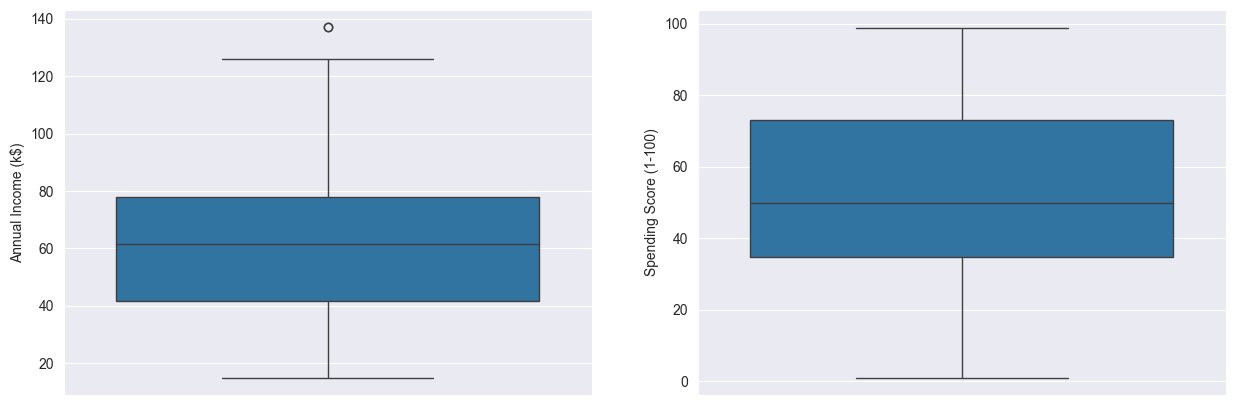

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")
plt.show()


_**Data Doesn't contain any Outliers**_

___

## Comparision between Male and Female

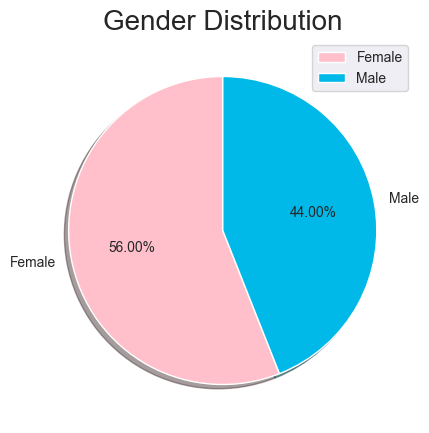

In [93]:
plt.figure(figsize=(10,5))
plt.pie(df['Genre'].value_counts(), colors=['pink', '#00B9E8'], explode=[0, 0.001], labels=['Female', 'Male'],
        shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

__**From the Above Pie Chart We can See Female customers Are More When We Compared to Men**__

___

## Age Distribution

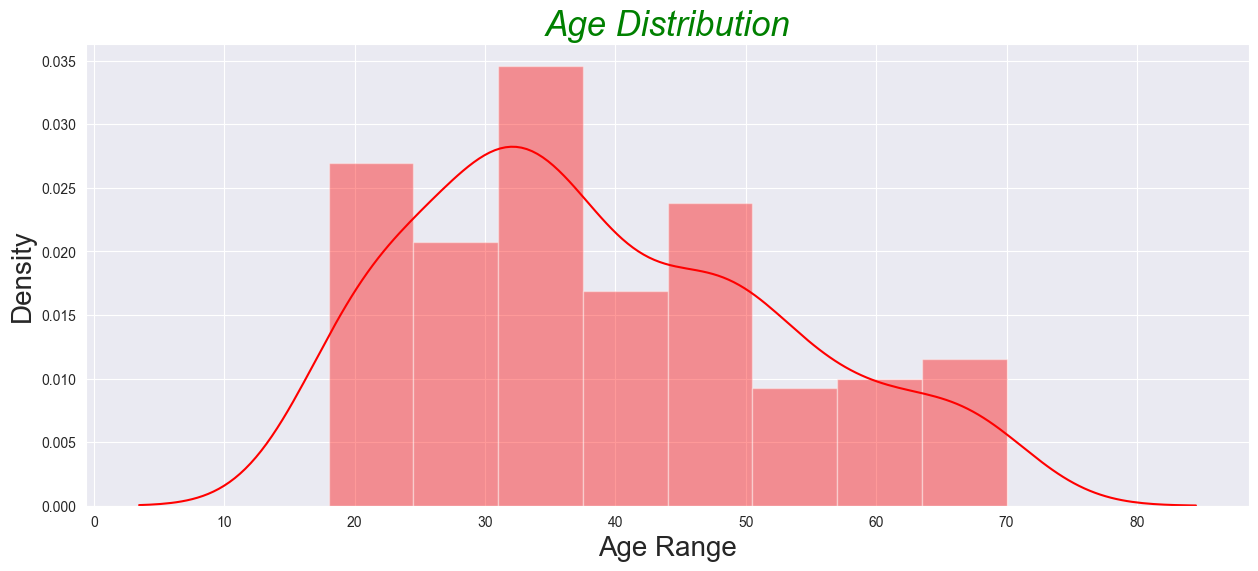

In [94]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')

sns.distplot(df.Age, color='red')
plt.title("Age Distribution",color="green",style="italic",fontsize=25)
plt.xlabel("Age Range",fontsize = 20)
plt.ylabel("Density", fontsize=20)
plt.show()

**There are customers of wide variety of ages. And most of the customer age range was 30 to 40**

___

## Distribution Annual income

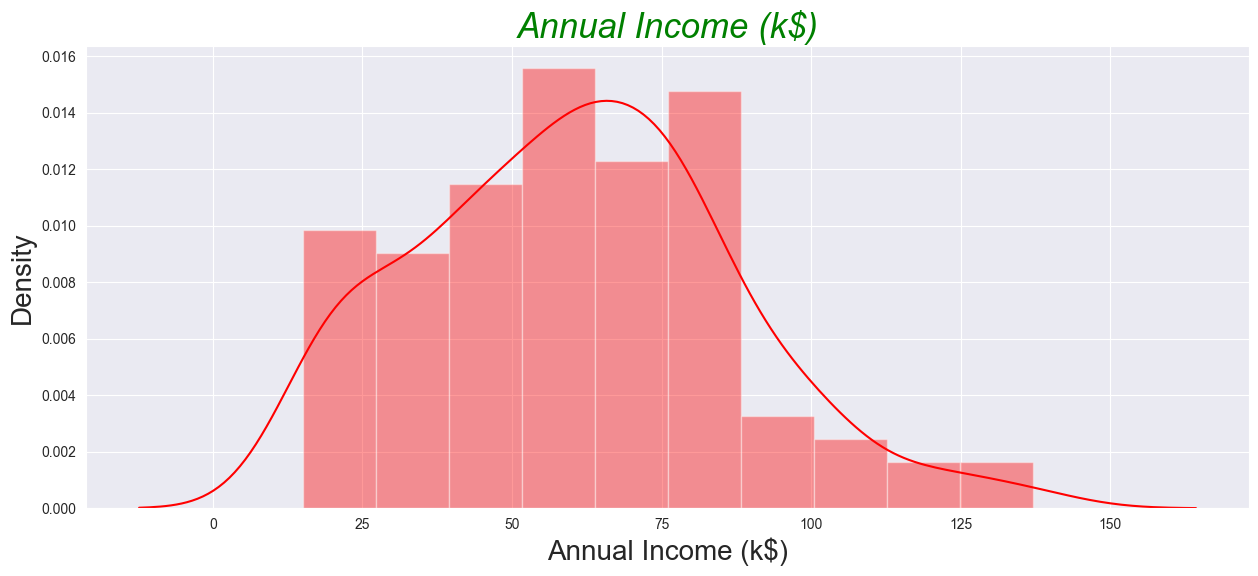

In [95]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')

sns.distplot(df["Annual Income (k$)"], color='red')
plt.title("Annual Income (k$)",color="green",style="italic",fontsize=25)
plt.xlabel("Annual Income (k$)",fontsize = 20)
plt.ylabel("Density", fontsize=20)
plt.show()

**Most of the coustmers Annual income Falls between 50k to 85k Dollers**

___

## Disburtion of Spending Score

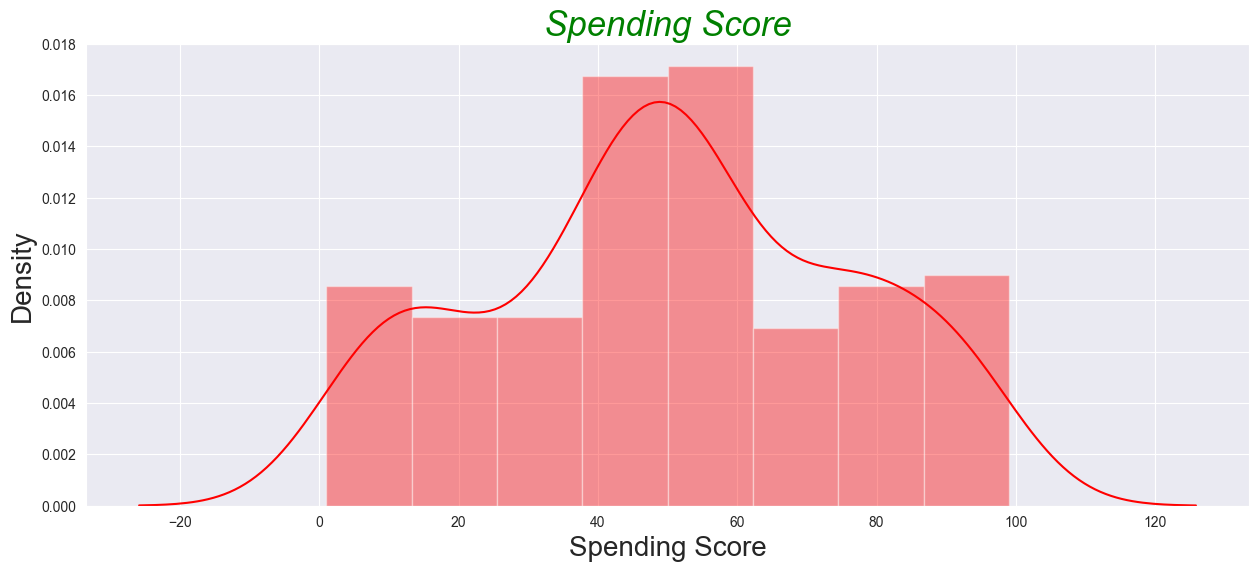

In [96]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')

sns.distplot(df["Spending Score (1-100)"], color='red')
plt.title("Spending Score",color="green",style="italic",fontsize=25)
plt.xlabel("Spending Score",fontsize = 20)
plt.ylabel("Density", fontsize=20)
plt.show()

**Most of Customers Got 40 to 60 score range**

___

# Performing Elbow Method

In [97]:
#creating a Blank list
bl=[]

In [98]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [99]:
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    bl.append(kmeans.inertia_)

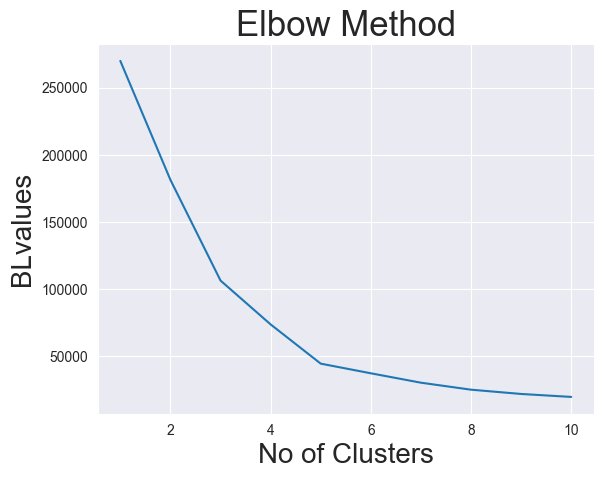

In [100]:
plt.plot(range(1,11), bl)
plt.title('Elbow Method',fontsize = 25)
plt.xlabel("No of Clusters",fontsize = 20)
plt.ylabel("BLvalues",fontsize = 20)
plt.show()

* **Plot Reduces 1 to 3 and slowdown Untill 5 and Flat from 6 to 10**
* **We are getting Elbow at 5**
* **Optimal No of clusters are 5**

# Training a Model Using Unsupervised Learning Algorithm
## K-Means

In [101]:
kmeansmodel =KMeans(n_clusters=5,init='k-means++',random_state=0)

In [102]:
y_kmeans = kmeansmodel.fit_predict(X)

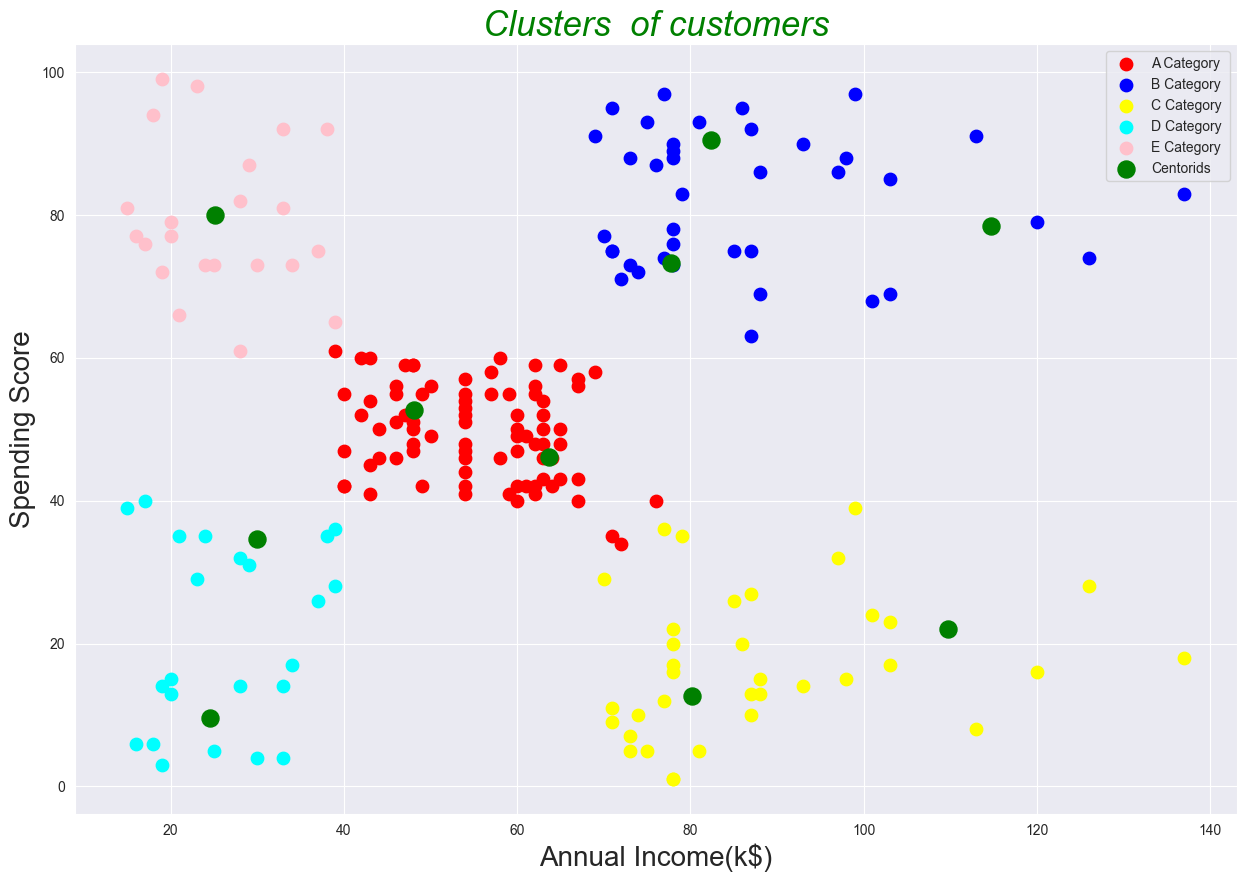

In [103]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans== 0,1], s=80, c='red', label='A Category')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans== 1,1], s=80, c="blue", label="B Category ")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans== 2,1], s=80, c="yellow", label="C Category")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans== 3,1], s=80, c="cyan", label="D Category")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans== 4,1], s=80, c="pink", label="E Category")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c="green",label='Centorids')
plt.title("Clusters  of customers",color="green",style="italic",fontsize=25)
plt.xlabel("Annual Income(k$)",fontsize = 20)
plt.ylabel("Spending Score", fontsize=20)
plt.legend()
plt.show()

* _Category A  = Customers with Decent Salary And Spending Also Quit Well_
* _Category B  = Customers with High Salary And Spending Also High_
* _Category C  = Customers with High Salary And Spending Low_
* _Category D  = Customers with Low Salary And Spending Also Low_
* _Category E  = Customers with Low Salary And Spending High_

* **Category A are Target Customers**
* **Most included in the Category A**
* **And With Well Spending with Decent Salary**
* **Company Will promote more their products more in the Category A Cluster then Other Clusters**